### Import the necessary packages

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [82]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

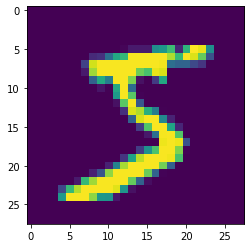

In [6]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.1924 - accuracy: 0.9562 - val_loss: 0.0707 - val_accuracy: 0.9793
Epoch 2/5
1875/1875 [==============================] - 162s 87ms/step - loss: 0.0600 - accuracy: 0.9823 - val_loss: 0.0696 - val_accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0848 - val_accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0957 - val_accuracy: 0.9780
Epoch 5/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0960 - val_accuracy: 0.9817


### Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09601505845785141, 0.9817000031471252]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

[[4.8029991e-15 1.5284376e-26 4.3916388e-14 2.2380338e-14 1.8528442e-23
  2.2067879e-23 1.3536882e-24 1.0000000e+00 2.0911223e-16 1.8784026e-13]
 [3.5456200e-11 3.5650312e-09 9.9999821e-01 5.7238539e-15 1.1177835e-18
  2.6570799e-16 1.7463193e-06 8.1540088e-21 3.1894819e-12 1.2230228e-17]
 [1.6596834e-13 9.9998450e-01 1.1942095e-11 3.0043113e-14 5.9297328e-08
  5.8478413e-12 3.6494167e-14 5.1570419e-12 1.5534370e-05 1.5173968e-14]
 [1.0000000e+00 5.1640301e-20 2.6658858e-17 1.2324186e-19 5.1680254e-22
  7.2229325e-14 2.3780663e-14 1.3703919e-17 1.1912617e-18 2.2408477e-15]]


In [18]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Save the model

In [27]:
model.save("model.h5")

In [28]:
!tar -zcvf model.tgz model.h5

model.h5


In [83]:
ls

model.h5  model.tgz


In [22]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 22.7 MB/s eta 0:00:01


In [84]:
from ibm_watson_machine_learning import APIClient
credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "NquMPe9miPRdqm-Jel3nXOwtCMVwSOVofIpbPqAVnaR9"
}
client = APIClient(credentials)

In [85]:
client = APIClient(credentials)

In [86]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [87]:
space_uid = guid_from_space_name(client, 'handwritten_deploy')
print("Space UID = " + space_uid)

Space UID = 7b2efbcc-e709-4748-91ba-2dfefd3218d6


In [88]:
client.set.default_space(space_uid)

'SUCCESS'

In [89]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [90]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [79]:
model_details = client.repository.store_model(model='model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid}
                                             )

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [91]:
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")
